In [1]:
#général
import pandas as pd
import numpy as np
import time
import os

#traitement texte
import re

#visualisation
import matplotlib.pyplot as plt

# Récupération du texte

In [2]:
import requests
from bs4 import BeautifulSoup

# URL de la page web à scraper
url = 'http://www.theatre-classique.fr/pages/programmes/PageEdition.php'

# Faites une requête HTTP pour obtenir le contenu de la page
response = requests.get(url)

# Vérifiez si la requête a réussi (statut code 200)
if response.status_code == 200:
    # Utilisez BeautifulSoup pour analyser le contenu HTML de la page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Créez une liste vide pour stocker les éléments href se terminant par '.txt'
    txt_links = []
    
    # Trouvez tous les éléments <a> ayant un attribut href se terminant par '.txt'
    elements = soup.find_all('a', href=lambda href: href and href.endswith('.txt'))

    # Parcourez les éléments trouvés et modifiez l'attribut href pour remplacer '../txt/' par 'http://www.theatre-classique.fr/pages/txt/'
    for element in elements:
        href_value = element['href']
        new_href = href_value.replace('../txt/', 'http://www.theatre-classique.fr/pages/txt/')
        element['href'] = new_href
    # et ajoutez leur contenu (liens) à la liste txt_links
        txt_links.append(new_href)
else:
    print('La requête a échoué avec le code de statut :', response.status_code)

In [3]:
# txt_links contient le lien vers toutes les pièces de théâtre

In [4]:
# Récupérez l'URL du fichier texte de la pièce qui nous intéresse
file_url = [string for string in txt_links if 'MALADEIMAGINAIRE' in string][0]
#print('file_url OK')

# Faites une requête HTTP pour télécharger le contenu du fichier texte
file_response = requests.get(file_url)
#print('file_response OK')

# Vérifiez si le téléchargement a réussi (statut code 200)
if file_response.status_code == 200:
    # Enregistrez le contenu dans un fichier local (par exemple "doc.txt")
    doc = os.path.basename(file_url)
    with open(doc, 'wb') as file:
        file.write(file_response.content)
    #print("Le fichier a été téléchargé avec succès.\n")
else:
    pass
    #print("Le téléchargement du fichier a échoué avec le code de statut :", file_response.status_code)

In [11]:
df=pd.read_fwf(doc,header=None,sep=" ",encoding = "ISO-8859-1")

In [12]:
df.tail()

,0,1,2,3,4,5,6,7,8
2466,"Viva, vivat, vivat, vivat, cent fois vivat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2467,"Novus Doctor, qui tam bene parlat,Mille, mille...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2468,DERNIÈRE ENTRÉE DE BALLET.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2469,"Des médecins, des chirurgiens et des apothicai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2470,==============================================...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from AnalyseTheatre import AnalyseTheatre as analyser
analyser = analyser()

lnom avant ['PREMIÈRE FEMME MAURE', 'MONSIEUR PURGON', 'TROUPE DE BERGÈRES', 'SECONDE FEMME MAURE', 'MONSIEUR FLEURANT', 'PERSONNAGES COMÉDIE', 'PRAESES', 'TOINETTE', 'TROISIÈME FEMME MAURE', 'CHORUS', 'CLIMÈNE', 'PRIMUS DOCTOR', 'TROUPE DE BERGERS', 'DC UTF', 'LES QUATRE AMANTS', 'ARAGAN', 'DC', 'BACHELIERUS', 'DEUX ZÉPHYRS', 'LOUISON', 'THOMAS DIAFOIRUS', 'LE NOTAIRE', 'POLICHINELLE', 'LE MALADE IMAGINAIRE', 'N LOUIS', 'TOUS', 'DC CC BY NC ND', 'BÉLINE', 'TOUS DEUX', 'FLORE PAN', 'BÉRALDE', 'DAPHNÉ', 'ARGAN', 'À PARIS DENYS THIERRY CLAUDE BARBIN PIERRE TRABOUILLET', 'QUINTUS DOCTOR', 'UNE VIEILLE', 'CHIRURGUS', 'TERTIUS DOCTOR', 'DORILAS', 'SECUNDUS DOCTOR', 'Ô À', 'DC LE MALADE IMAGINAIRE COMÉDIE', 'MONSIEUR DIAFOIRUS', 'LOUIS', 'PLAINTE DE LA BERGÈRE', 'TIRCIS DORILAS', 'DC MOLIERE', 'PAN', 'M DC LXXXII AVEC PRIVILÈGE DU ROI', 'TIRCIS', 'FLORE', 'BALLET', 'QUATRIÈME FEMME MAURE', 'DC MOLIERE_MALADEIMAGINAIRE', 'FAUNES', 'DC FIEVRE', 'CLÉANTE', 'COMÉDIE MÊLÉE DE MUSIQUE ET DE DANSES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


data       Index                 Acte      Scène Personnage  Nb de mots
0       193               ACTE I    SCÈNE I      ARGAN           0
1       196               ACTE I   SCÈNE II   TOINETTE           7
2       198               ACTE I   SCÈNE II      ARGAN           0
3       200               ACTE I   SCÈNE II   TOINETTE           0
4       202               ACTE I   SCÈNE II      ARGAN          13
...     ...                  ...        ...        ...         ...
1016   2451  TROISIÈME INTERMÈDE  SCÈNE XIV  CHIRURGUS          94
1017   2454  TROISIÈME INTERMÈDE  SCÈNE XIV     CHORUS         127
1018   2457  TROISIÈME INTERMÈDE  SCÈNE XIV  CHIRURGUS         136
1019   2460  TROISIÈME INTERMÈDE  SCÈNE XIV     CHORUS         126
1020   2463  TROISIÈME INTERMÈDE  SCÈNE XIV     BALLET         115

[1021 rows x 5 columns]
series Acte                 Personnage           
ACTE I               ANGÉLIQUE                2703
                     ARGAN                    6382
              

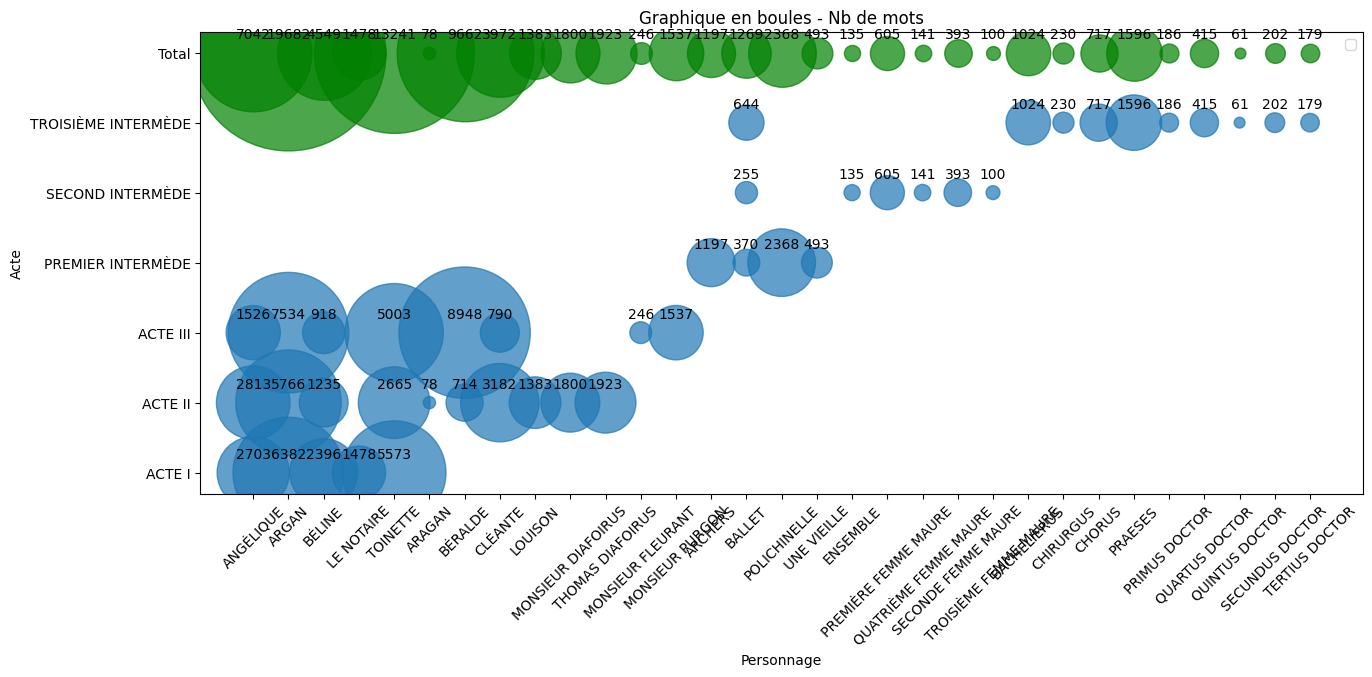

temps de traitement =  3.4142673015594482


In [17]:
analyser.visualisation(df_, 'général')

In [15]:
df.tail()

,0,1,2,3,4,5,6,7,8
2466,"Viva, vivat, vivat, vivat, cent fois vivat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2467,"Novus Doctor, qui tam bene parlat,Mille, mille...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2468,DERNIÈRE ENTRÉE DE BALLET.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2469,"Des médecins, des chirurgiens et des apothicai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2470,==============================================...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le fichier est déjà ouvert.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Le fichier est déjà ouvert.
Index(['ANGÉLIQUE', 'ARGAN', 'BÉLINE', 'LE NOTAIRE', 'ANGÉLIQUE', 'ARGAN',
       'BÉLINE', 'ANGÉLIQUE', 'ARGAN', 'BÉLINE'],
      dtype='object', name='Personnage')
Index(['ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I',
       'ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I',
       'ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I',
       'ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I ACTE I',
       'ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II',
       'ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II',
       'ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II ACTE II',
       '

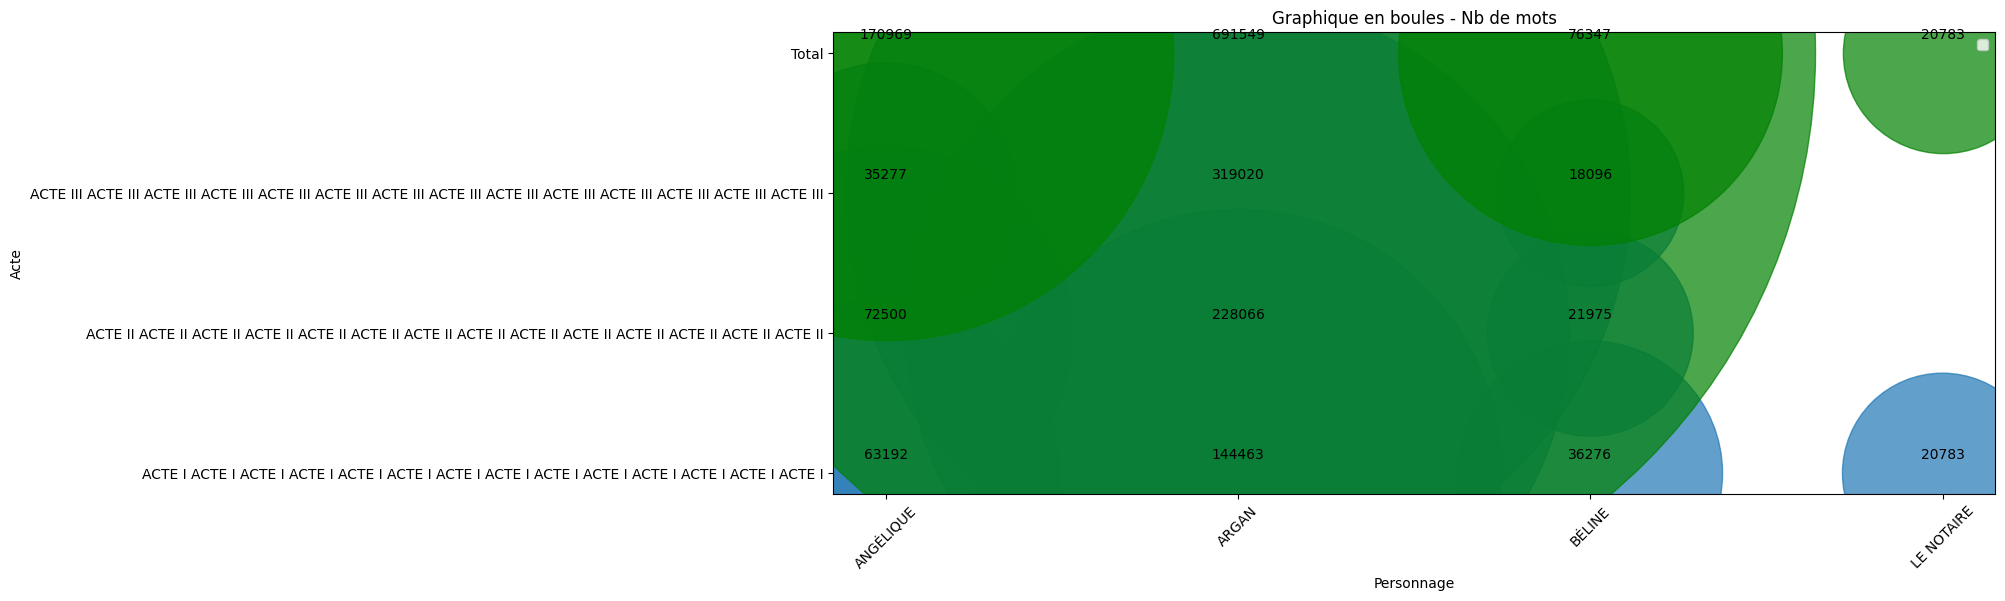

temps de traitement =  1.6070194244384766


In [96]:
analyser.visualisation(df, genre='correction', lnom=['ANGÉLIQUE', 'ARGAN', 'BÉLINE', 'LE NOTAIRE'])

# Tokenizer le texte

In [6]:

# On enlève la ponctuation et on tokenize
from nltk.tokenize import RegexpTokenizer
for c in range(0,df.shape[1]):
    for r in range(0,len(df)):
        if type(df.iloc[r,c]) == str :
            tokenizer = RegexpTokenizer(r'\w+')
            df.at[r,c] = tokenizer.tokenize(df.iloc[r,c])

In [7]:
# A ce state chaque cellule de df contient une liste de mots sans ponctutation
df.head()

,0,1,2,3,4,5,6,7,8
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[DC, Author, MOLIERE]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[DC, Creator, FIEVRE, Paul]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[DC, Publisher, FIEVRE, Paul]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Rassembler les lignes dans une colonne "cleaned"
from functools import reduce
col = []
for i in range(0, len(df)):
    col.append(reduce(lambda x,y : x+y if (type(x) == list and type(y) == list) else x, df[i:i+1].values.tolist()[0]))
df["cleaned"] = col

In [9]:
# A ce state df a en plus une colonne 'cleaned' qui contient la liste de tous les mots de la ligne

In [10]:
# On réduit df à une colonne qui contient la liste de tous les mots de la ligne
df = pd.DataFrame(df["cleaned"])
df.head()

,cleaned
0,[]
1,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]"
2,"[DC, Author, MOLIERE]"
3,"[DC, Creator, FIEVRE, Paul]"
4,"[DC, Publisher, FIEVRE, Paul]"


# Labelliser

In [11]:
# Supprimer les lignes où la col 'cleaned' contient une liste vide
df = df[df['cleaned'].apply(lambda x: len(x) > 0)]

# Réinitialiser l'index du DataFrame 
df.reset_index(drop=True, inplace=True)
df.head()

,cleaned
0,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]"
1,"[DC, Author, MOLIERE]"
2,"[DC, Creator, FIEVRE, Paul]"
3,"[DC, Publisher, FIEVRE, Paul]"
4,"[DC, Subject, Comédie]"


In [12]:
# On rajoute une colonne label avec les valeurs structure ou note   
def label(x):
    if x[0].isupper():
        return 'structure'
    elif 'Note' in x:
        return 'note'
    else:
        return None  # Si aucune condition n'est satisfaite

df['label'] = df['cleaned'].map(label)

In [13]:
# A ce stade df contient deux colonnes : 'cleaned' et 'label' qui contient structure, note ou None
df

,cleaned,label
0,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]",structure
1,"[DC, Author, MOLIERE]",structure
2,"[DC, Creator, FIEVRE, Paul]",structure
3,"[DC, Publisher, FIEVRE, Paul]",structure
4,"[DC, Subject, Comédie]",structure
...,...,...
2460,[CHORUS],structure
2461,"[Viva, vivat, vivat, vivat, cent, fois, vivat]",None
2462,"[Novus, Doctor, qui, tam, bene, parlat, Mille,...",None
2463,"[DERNIÈRE, ENTRÉE, DE, BALLET]",structure


In [14]:
# On va colorer les lignes labellisées structure ou note et voir ce que ça donne sur un doc excel
data = df.copy()
# Indices des lignes à colorer
indices_to_color = range(0, len(data))

# Création de la fonction de mise en forme pour colorer les lignes spécifiques
def highlighter(row):
    if df.iloc[row.name, 1] =='structure':
        return ['background-color: yellow'] * len(row)
    elif df.iloc[row.name, 1] =='note':
        return ['background-color: red'] * len(row)
    else:
        return [''] * len(row) 

# Application de la fonction de mise en forme au DataFrame
styled_df = df.style.apply(highlighter, axis=1)

# Affichage du DataFrame stylisé
try : 
    styled_df.to_excel("df_color.xlsx",index=False)
    os.startfile("df_color.xlsx")
except PermissionError :
    print("Le fichier est déjà ouvert.")

In [15]:
# Supprimer les lignes où la col 'cleaned' contient une liste vide
df = df[df['cleaned'].apply(lambda x: len(x) > 0)]

# Réinitialiser l'index du DataFrame 
df.reset_index(drop=True, inplace=True)
df.head()

,cleaned,label
0,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]",structure
1,"[DC, Author, MOLIERE]",structure
2,"[DC, Creator, FIEVRE, Paul]",structure
3,"[DC, Publisher, FIEVRE, Paul]",structure
4,"[DC, Subject, Comédie]",structure


In [16]:
# Supprimer les lignes labellisées note
df = df[df['label']!='note'] 

In [17]:
# A ce stade df est complètement nettoyé
df.head()

,cleaned,label
0,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]",structure
1,"[DC, Author, MOLIERE]",structure
2,"[DC, Creator, FIEVRE, Paul]",structure
3,"[DC, Publisher, FIEVRE, Paul]",structure
4,"[DC, Subject, Comédie]",structure


In [18]:
# Liste des éléments de structure
col_cleaned_struct = df.loc[df['label'] == 'structure', 'cleaned']

def extract_structure(cell):
    struct = [i for i in cell if i.isupper()]
    return struct

lstruct = [extract_structure(cell) for cell in col_cleaned_struct]
lstruct[0:5] 

[['DC', 'LE', 'MALADE', 'IMAGINAIRE', 'COMÉDIE'],
 ['DC', 'MOLIERE'],
 ['DC', 'FIEVRE'],
 ['DC', 'FIEVRE'],
 ['DC']]

In [19]:
# Utilisation d'une compréhension de liste pour convertir lstruct en une liste de strings sans doublons
lstruct = [' '.join(sublist) for sublist in set(tuple(sublist) for sublist in lstruct)]

# Récupération de la liste des personnages

In [20]:
t1 = time.time()

In [21]:
lstruct

['N LOUIS',
 'SCÈNE VI',
 'SCÈNE I',
 'TIRCIS',
 'DERNIÈRE ENTRÉE DE BALLET',
 'DC',
 'SECUNDUS DOCTOR',
 'FLORE PAN',
 'DC UTF',
 'ACTE II',
 'SCÈNE IX',
 'C',
 'QUATRIÈME FEMME MAURE',
 'À',
 'TROISIÈME FEMME MAURE',
 'DC LE MALADE IMAGINAIRE COMÉDIE',
 'DERNIÈRE ET GRANDRE ENTRÉE DE BALLET',
 'D',
 'S',
 'THOMAS DIAFOIRUS',
 'ÉGLOGUE EN MUSIQUE ET EN DANSE',
 'CHIRURGUS',
 'SCÈNE XIII',
 'BACHELIERUS',
 'J',
 'COMÉDIE MÊLÉE DE MUSIQUE ET DE DANSES',
 'POLICHINELLE',
 'MONSIEUR FLEURANT',
 'BALLET',
 'Ô',
 'TOUS DEUX',
 'CHORUS',
 'TOINETTE',
 'SCÈNE X',
 'QUINTUS DOCTOR',
 'QUARTUS DOCTOR',
 'CLIMÈNE DAPHNÉ',
 'PREMIER INTERMÈDE',
 'DEUX ZÉPHYRS',
 'LOUIS',
 'BÉLINE',
 'À PARIS DENYS THIERRY CLAUDE BARBIN PIERRE TRABOUILLET',
 'DC MOLIERE_MALADEIMAGINAIRE',
 'M DC LXXXII AVEC PRIVILÈGE DU ROI',
 'ACTE I',
 'SCÈNE III',
 'BÉRALDE',
 'DAPHNÉ',
 'SCÈNE XII',
 'Ô À',
 'TOUS',
 'N',
 'SCÈNE VIII',
 'SCÈNE XIV',
 'ANGÉLIQUE',
 'SCÈNE II',
 'SECOND INTERMÈDE',
 'DORILAS',
 'DC FIEVRE',
 'P

In [22]:
# on supprime les éléments à une lettre
lstruct = [i for i in lstruct if len(i)>1]

In [23]:
lstruct[0:20]

['N LOUIS',
 'SCÈNE VI',
 'SCÈNE I',
 'TIRCIS',
 'DERNIÈRE ENTRÉE DE BALLET',
 'DC',
 'SECUNDUS DOCTOR',
 'FLORE PAN',
 'DC UTF',
 'ACTE II',
 'SCÈNE IX',
 'QUATRIÈME FEMME MAURE',
 'TROISIÈME FEMME MAURE',
 'DC LE MALADE IMAGINAIRE COMÉDIE',
 'DERNIÈRE ET GRANDRE ENTRÉE DE BALLET',
 'THOMAS DIAFOIRUS',
 'ÉGLOGUE EN MUSIQUE ET EN DANSE',
 'CHIRURGUS',
 'SCÈNE XIII',
 'BACHELIERUS']

In [24]:
# lstage est la liste des éléments de découpage de la pièce
exclusion_list = ['SCÈNE', 'ACTE', 'ENTRÉE', 'INTERMÈDE', 'PROLOGUE', 'ÉGLOGUE']
lstage = [i for i in lstruct if any(excl in i for excl in exclusion_list)]
lstage

['SCÈNE VI',
 'SCÈNE I',
 'DERNIÈRE ENTRÉE DE BALLET',
 'ACTE II',
 'SCÈNE IX',
 'DERNIÈRE ET GRANDRE ENTRÉE DE BALLET',
 'ÉGLOGUE EN MUSIQUE ET EN DANSE',
 'SCÈNE XIII',
 'SCÈNE X',
 'PREMIER INTERMÈDE',
 'ACTE I',
 'SCÈNE III',
 'SCÈNE XII',
 'SCÈNE VIII',
 'SCÈNE XIV',
 'SCÈNE II',
 'SECOND INTERMÈDE',
 'AUTRE PROLOGUE',
 'SCÈNE VII',
 'SCÈNE XI',
 'PERSONNAGES PROLOGUE',
 'ENTRÉE BALLET',
 'ENTRÉE DE BALLET',
 'AUTRE ENTRÉE DE BALLET',
 'LE PROLOGUE',
 'SCÈNE V',
 'TROISIÈME INTERMÈDE',
 'ACTE III',
 'SCÈNE IV']

In [25]:
# lnom est la liste des noms
exclusion_list = ['SCÈNE', 'ACTE', 'ENTRÉE', 'INTERMÈDE', 'PROLOGUE', 'ÉGLOGUE']
lnom = [i for i in lstruct if not any(excl in i for excl in exclusion_list)]
lnom

['N LOUIS',
 'TIRCIS',
 'DC',
 'SECUNDUS DOCTOR',
 'FLORE PAN',
 'DC UTF',
 'QUATRIÈME FEMME MAURE',
 'TROISIÈME FEMME MAURE',
 'DC LE MALADE IMAGINAIRE COMÉDIE',
 'THOMAS DIAFOIRUS',
 'CHIRURGUS',
 'BACHELIERUS',
 'COMÉDIE MÊLÉE DE MUSIQUE ET DE DANSES',
 'POLICHINELLE',
 'MONSIEUR FLEURANT',
 'BALLET',
 'TOUS DEUX',
 'CHORUS',
 'TOINETTE',
 'QUINTUS DOCTOR',
 'QUARTUS DOCTOR',
 'CLIMÈNE DAPHNÉ',
 'DEUX ZÉPHYRS',
 'LOUIS',
 'BÉLINE',
 'À PARIS DENYS THIERRY CLAUDE BARBIN PIERRE TRABOUILLET',
 'DC MOLIERE_MALADEIMAGINAIRE',
 'M DC LXXXII AVEC PRIVILÈGE DU ROI',
 'BÉRALDE',
 'DAPHNÉ',
 'Ô À',
 'TOUS',
 'ANGÉLIQUE',
 'DORILAS',
 'DC FIEVRE',
 'PRIMUS DOCTOR',
 'PAN',
 'TIRCIS DORILAS',
 'LES QUATRE AMANTS',
 'MONSIEUR BONNEFOY',
 'DC MOLIERE',
 'DC CC BY NC ND',
 'FLORE',
 'ARGAN',
 'ARCHERS',
 'PREMIÈRE FEMME MAURE',
 'PERSONNAGES COMÉDIE',
 'TERTIUS DOCTOR',
 'MONSIEUR DIAFOIRUS',
 'LE NOTAIRE',
 'ENSEMBLE',
 'MONSIEUR PURGON',
 'TROUPE DE BERGERS',
 'ARAGAN',
 'SECONDE FEMME MAURE',
 

In [26]:
df

,cleaned,label
0,"[DC, Title, LE, MALADE, IMAGINAIRE, COMÉDIE]",structure
1,"[DC, Author, MOLIERE]",structure
2,"[DC, Creator, FIEVRE, Paul]",structure
3,"[DC, Publisher, FIEVRE, Paul]",structure
4,"[DC, Subject, Comédie]",structure
...,...,...
2460,[CHORUS],structure
2461,"[Viva, vivat, vivat, vivat, cent, fois, vivat]",None
2462,"[Novus, Doctor, qui, tam, bene, parlat, Mille,...",None
2463,"[DERNIÈRE, ENTRÉE, DE, BALLET]",structure


# Exploration

In [27]:
# On transforme les listes de df['cleaned'] en string
df['cleaned'] = list(map(lambda x : ' '.join(x),df['cleaned']))

## 1-Cleaning

In [28]:
# A cde stade les listes ont été transformées en strings
df.head()

,cleaned,label
0,DC Title LE MALADE IMAGINAIRE COMÉDIE,structure
1,DC Author MOLIERE,structure
2,DC Creator FIEVRE Paul,structure
3,DC Publisher FIEVRE Paul,structure
4,DC Subject Comédie,structure


## 2-Extraction des données

In [29]:
# Création d'un tableau réduit aux lignes étapes et personnages
# On remplit de lignes data en in itèrant sur le DataFrame df en utilisant iterrows()
data =  [['Index', 'Acte', 'Scène', 'Personnage', 'Nb de mots']] + [
    [index, nom, 0, 0, 0]
    for index, row in df.iterrows()
    for nom in lnom + lstage
    if nom in row["cleaned"]
]

In [30]:
# Il y a un petit soucis avec les chiffres romains. On va supprimer les lignes inutiles donnant la priorité par rapport 
# à une liste
lstage.sort(reverse=True)

In [31]:
lstage

['ÉGLOGUE EN MUSIQUE ET EN DANSE',
 'TROISIÈME INTERMÈDE',
 'SECOND INTERMÈDE',
 'SCÈNE XIV',
 'SCÈNE XIII',
 'SCÈNE XII',
 'SCÈNE XI',
 'SCÈNE X',
 'SCÈNE VIII',
 'SCÈNE VII',
 'SCÈNE VI',
 'SCÈNE V',
 'SCÈNE IX',
 'SCÈNE IV',
 'SCÈNE III',
 'SCÈNE II',
 'SCÈNE I',
 'PREMIER INTERMÈDE',
 'PERSONNAGES PROLOGUE',
 'LE PROLOGUE',
 'ENTRÉE DE BALLET',
 'ENTRÉE BALLET',
 'DERNIÈRE ET GRANDRE ENTRÉE DE BALLET',
 'DERNIÈRE ENTRÉE DE BALLET',
 'AUTRE PROLOGUE',
 'AUTRE ENTRÉE DE BALLET',
 'ACTE III',
 'ACTE II',
 'ACTE I']

In [32]:
def del_doublons(data):
    # Crée un dictionnaire pour marquer les doublons
    duplicates = {}

    for i in range(len(data) - 1):
        if data[i][0] == data[i+1][0]:
            # On vérifie quel genre de doublon c'est
            if data[i][1] in lstage:
                i_ = lstage.index(data[i][1])
                i__ = lstage.index(data[i+1][1])
                if i__ > i_:
                    duplicates[i+1] = True
                else:
                    duplicates[i] = True
            else:
                duplicates[i+1] = True

    # On supprime les doublons marqués
    data = [x for i, x in enumerate(data) if i not in duplicates]

    return data

In [33]:
# Supprimons les doublons
while len(data) != len(set(x[0] for x in data)) :
    print(len(data)-len(set(x[0] for x in data)))
    data = del_doublons(data)

104
4


In [34]:
#vérification
[x for x in data if x[1] in lstage]

[[52, 'LE PROLOGUE', 0, 0, 0],
 [55, 'ÉGLOGUE EN MUSIQUE ET EN DANSE', 0, 0, 0],
 [169, 'AUTRE PROLOGUE', 0, 0, 0],
 [191, 'ACTE I', 0, 0, 0],
 [192, 'SCÈNE I', 0, 0, 0],
 [195, 'SCÈNE II', 0, 0, 0],
 [262, 'SCÈNE III', 0, 0, 0],
 [271, 'SCÈNE IV', 0, 0, 0],
 [352, 'SCÈNE V', 0, 0, 0],
 [591, 'SCÈNE VI', 0, 0, 0],
 [690, 'SCÈNE VII', 0, 0, 0],
 [751, 'SCÈNE VIII', 0, 0, 0],
 [766, 'PREMIER INTERMÈDE', 0, 0, 0],
 [959, 'ACTE II', 0, 0, 0],
 [960, 'SCÈNE I', 0, 0, 0],
 [975, 'SCÈNE II', 0, 0, 0],
 [1032, 'SCÈNE III', 0, 0, 0],
 [1051, 'SCÈNE IV', 0, 0, 0],
 [1072, 'SCÈNE V', 0, 0, 0],
 [1259, 'SCÈNE VI', 0, 0, 0],
 [1394, 'SCÈNE VII', 0, 0, 0],
 [1403, 'SCÈNE VIII', 0, 0, 0],
 [1544, 'SCÈNE IX', 0, 0, 0],
 [1563, 'SECOND INTERMÈDE', 0, 0, 0],
 [1639, 'ACTE III', 0, 0, 0],
 [1640, 'SCÈNE I', 0, 0, 0],
 [1654, 'SCÈNE II', 0, 0, 0],
 [1665, 'SCÈNE III', 0, 0, 0],
 [1784, 'SCÈNE IV', 0, 0, 0],
 [1811, 'SCÈNE V', 0, 0, 0],
 [1924, 'SCÈNE VI', 0, 0, 0],
 [1945, 'SCÈNE VII', 0, 0, 0],
 [1966, '

In [35]:
# on met les noms et les scènes à leur place
for r in range(1, len(data)):
    if data[r][1] in lnom:
        data[r][3] = data[r][1]
        data[r][1] = 0  # on fait la même chose pour Scène

    try:
        if 'SCÈNE' in data[r][1]:
            data[r][2] = data[r][1]
            data[r][1] = 0
    except:
        continue

In [36]:
# on fait la même chose pour Acte
# Pas besoin il est déjà à sa place

In [37]:
# Maintenant dans les lignes où on a le nom des personnages on va compter le nb de mot dans la tirade
# On stock le n° de la ligne considérée
list_nom_vide = [data[i][0] for i in range(1,len(data)) if data[i][3]!=0]

In [38]:
# On stocke dans des variable l'index des lignes de départ (exlus) et de fin de la tirade (exclus)
for i in range(0,len(list_nom_vide)):
    db = list_nom_vide[i]
    try :
        fi = list_nom_vide[i+1]
    except :
        fi = db + 2
    try :
        # On stocke dans une variable le nombre de mots entre db exclus jusqu'à fi exclus
        nb = reduce(lambda x,y : x+y, [len(df.loc[df.index ==r,"cleaned"].values.tolist()[0]) for r in range(db+1,fi)])
        # Et on met ce nombre dans la dernière cellule de la ligne correspondant à db dans data_
        index = None
        for i, row in enumerate(data):
            if row[0] == db:
                index = i
                break
        data[index][-1] = nb
    except :
        continue

In [39]:
data

[['Index', 'Acte', 'Scène', 'Personnage', 'Nb de mots'],
 [0, 0, 0, 'DC', 0],
 [1, 0, 0, 'DC', 0],
 [2, 0, 0, 'DC', 0],
 [3, 0, 0, 'DC', 0],
 [4, 0, 0, 'DC', 0],
 [5, 0, 0, 'DC', 0],
 [6, 0, 0, 'DC', 0],
 [7, 0, 0, 'DC', 0],
 [8, 0, 0, 'DC', 0],
 [9, 0, 0, 'DC', 0],
 [10, 0, 0, 'DC', 0],
 [11, 0, 0, 'DC', 0],
 [12, 0, 0, 'DC', 0],
 [13, 0, 0, 'DC', 0],
 [14, 0, 0, 'DC', 0],
 [15, 0, 0, 'DC', 0],
 [16, 0, 0, 'DC', 0],
 [17, 0, 0, 'DC', 0],
 [18, 0, 0, 'DC', 0],
 [19, 0, 0, 'LE MALADE IMAGINAIRE', 0],
 [20, 0, 0, 'COMÉDIE MÊLÉE DE MUSIQUE ET DE DANSES', 259],
 [23, 0, 0, 'DC', 545],
 [28, 0, 0, 'FLORE', 0],
 [29, 0, 0, 'PAN', 0],
 [30, 0, 0, 'FAUNES', 0],
 [31, 0, 0, 'CLIMÈNE', 0],
 [32, 0, 0, 'DAPHNÉ', 0],
 [33, 0, 0, 'TIRCIS', 0],
 [34, 0, 0, 'DORILAS', 0],
 [35, 0, 0, 'DEUX ZÉPHYRS', 0],
 [36, 0, 0, 'TROUPE DE BERGERS', 0],
 [37, 0, 0, 'TROUPE DE BERGÈRES', 25],
 [39, 0, 0, 'ARGAN', 0],
 [40, 0, 0, 'BÉLINE', 0],
 [41, 0, 0, 'ANGÉLIQUE', 0],
 [42, 0, 0, 'LOUIS', 0],
 [43, 0, 0, 'BÉRALD

In [40]:
#on va colorer les lignes caractéristiques détectées et voir ce que ça donne sur un doc excel
data = data.copy()
# Indices des lignes à colorer
indices_to_color = [data[r][0] for r in range(1, len(data))]

# Création de la fonction de mise en forme pour colorer les lignes spécifiques
def highlighter(row):
    if row.name in indices_to_color:
        return ['background-color: yellow'] * len(row)
    elif row.name not in indices_to_color:
        return ['background-color: green'] * len(row)
    else:
        return [''] * len(row) 

# Application de la fonction de mise en forme au DataFrame
styled_df = df.style.apply(highlighter, axis=1)

# Affichage du DataFrame stylisé
try :    
    styled_df.to_excel("df_color.xlsx",index=False)
    os.startfile("df_color.xlsx")
except PermissionError :
    print("Le fichier est déjà ouvert.")

Le fichier est déjà ouvert.


In [41]:
# Eventuellement on peut corriger certaines chose et recommencer à 0
df_corrected = pd.read_excel('df_color.xlsx')

In [42]:
# Maintenant on met les actes et les scènes dans les lignes au même niveau que les personnages dans data_
for r in range(1, len(data)):
    if data[r][1] != 0:
        i = r + 1
        try:
            while data[i][1] == 0:
                data[i][1] = data[r][1]
                i = i + 1
        except:
            pass

    if data[r][2] != 0:
        i = r + 1
        try:
            while data[i][2] == 0:
                data[i][2] = data[r][2]
                i = i + 1
        except:
            pass

In [43]:
# Et pour terminer on supprime toutes les lignes qui n'ont pas de structure ou de personnage
data = [row for row in data if row[2]!=0 and row[3]!=0]

In [44]:
# On convertit ce tableau récapitulatif en df pour la visualisation
data = pd.DataFrame(data[1:], columns = data[0])

In [45]:
data

,Index,Acte,Scène,Personnage,Nb de mots
0,193,ACTE I,SCÈNE I,ARGAN,0
1,196,ACTE I,SCÈNE II,TOINETTE,7
2,198,ACTE I,SCÈNE II,ARGAN,0
3,200,ACTE I,SCÈNE II,TOINETTE,0
4,202,ACTE I,SCÈNE II,ARGAN,13
...,...,...,...,...,...
1016,2451,TROISIÈME INTERMÈDE,SCÈNE XIV,CHIRURGUS,94
1017,2454,TROISIÈME INTERMÈDE,SCÈNE XIV,CHORUS,127
1018,2457,TROISIÈME INTERMÈDE,SCÈNE XIV,CHIRURGUS,136
1019,2460,TROISIÈME INTERMÈDE,SCÈNE XIV,CHORUS,126


In [46]:
series = data.groupby(['Acte','Personnage'])['Nb de mots'].sum()

## Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['ANGÉLIQUE', 'ARGAN', 'BÉLINE', 'LE NOTAIRE', 'TOINETTE', 'ANGÉLIQUE',
       'ARAGAN', 'ARGAN', 'BÉLINE', 'BÉRALDE', 'CLÉANTE', 'LOUIS',
       'MONSIEUR DIAFOIRUS', 'THOMAS DIAFOIRUS', 'TOINETTE', 'ANGÉLIQUE',
       'ARGAN', 'BÉLINE', 'BÉRALDE', 'CLÉANTE', 'MONSIEUR FLEURANT',
       'MONSIEUR PURGON', 'TOINETTE', 'ARCHERS', 'BALLET', 'POLICHINELLE',
       'UNE VIEILLE', 'BALLET', 'ENSEMBLE', 'PREMIÈRE FEMME MAURE',
       'QUATRIÈME FEMME MAURE', 'SECONDE FEMME MAURE', 'TROISIÈME FEMME MAURE',
       'BACHELIERUS', 'BALLET', 'CHIRURGUS', 'CHORUS', 'PRAESES',
       'PRIMUS DOCTOR', 'QUARTUS DOCTOR', 'QUINTUS DOCTOR', 'SECUNDUS DOCTOR',
       'TERTIUS DOCTOR'],
      dtype='object', name='Personnage')
Index(['ACTE I', 'ACTE I', 'ACTE I', 'ACTE I', 'ACTE I', 'ACTE II', 'ACTE II',
       'ACTE II', 'ACTE II', 'ACTE II', 'ACTE II', 'ACTE II', 'ACTE II',
       'ACTE II', 'ACTE II', 'ACTE III', 'ACTE III', 'ACTE III', 'ACTE III',
       'ACTE III', 'ACTE III', 'ACTE III', 'ACTE

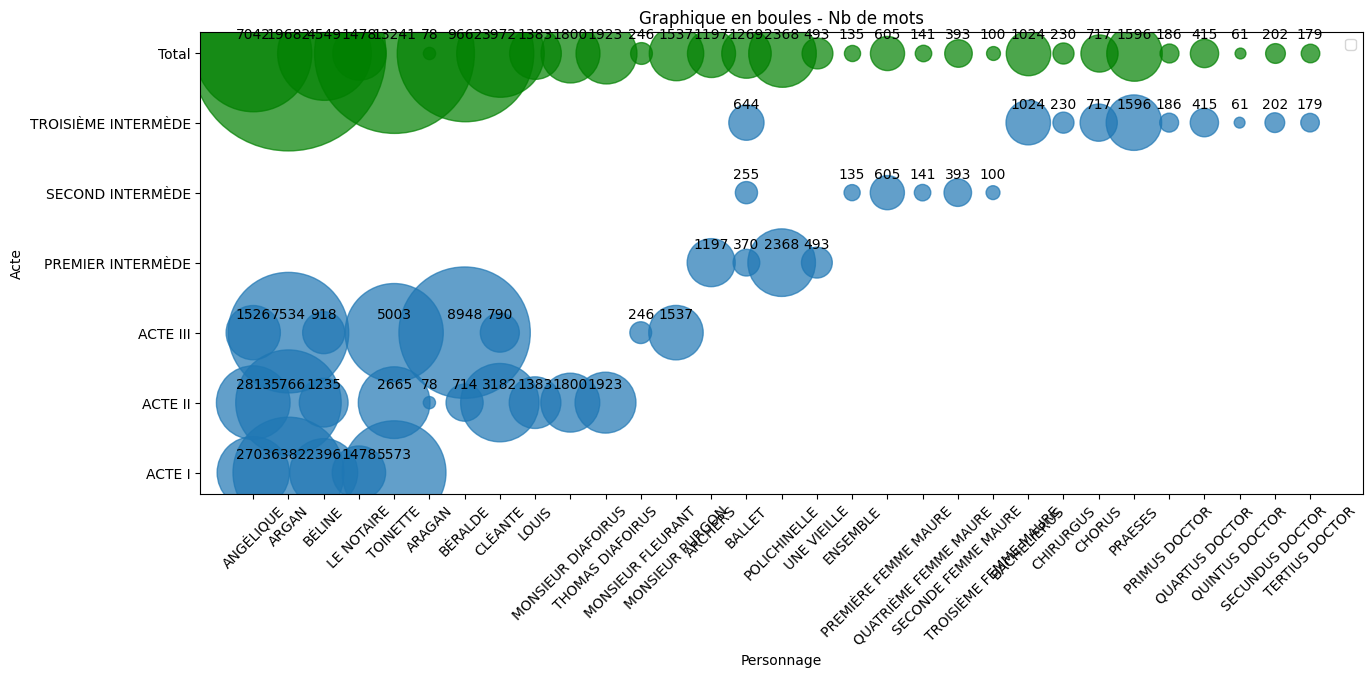

temps de traitement =  8.126579999923706


In [47]:
# Calculer le total par personnage
total_par_personnage = series.groupby(level='Personnage').sum()

# Création du graphique en boules initial
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(series.index.get_level_values('Personnage'), series.index.get_level_values('Acte'),
           s=series.values, alpha=0.7)

# Ajouter des boules pour le total par personnage
for personnage, total in total_par_personnage.items():
    ax.scatter(personnage, "Total", s=total, c='green', alpha=0.7)#, label=f'Total {personnage}')

# Configuration des axes et du titre
ax.set_xlabel('Personnage')
ax.set_ylabel('Acte')
ax.set_title('Graphique en boules - Nb de mots')
plt.xticks(rotation=45)

# Vérification
print(series.index.get_level_values('Personnage')) 
print(series.index.get_level_values('Acte'))

# Afficher la valeur dans la boule pour le graphique initial
for x, y, val in zip(series.index.get_level_values('Personnage'), series.index.get_level_values('Acte'), series.values):
    ax.annotate(str(val), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Afficher la valeur dans la boule pour le total par personnage
for personnage, total in total_par_personnage.items():
    ax.annotate(str(total), (personnage, "Total"), textcoords="offset points", xytext=(0, 10), ha='center')

# Légende pour les boules du total par personnage
ax.legend()

# Affichage du graphique
plt.show()
print("temps de traitement = ", time.time()-t1)

# Filtrage des éléments de visualisation

In [48]:
list_pers = ['ANGÉLIQUE', 'ARGAN', 'BÉLINE', 'LE NOTAIRE', 'TOINETTE', 
             'ANGÉLIQUE','BÉRALDE', 'CLÉANTE', 'LOUIS', 'MONSIEUR DIAFOIRUS', 
             'THOMAS DIAFOIRUS',  'MONSIEUR FLEURANT', 'MONSIEUR PURGON', 'LOUISON']

list_stage = ['ACTE I','ACTE II', 'ACTE III']

In [49]:
data_select = data[data['Acte'].isin(list_stage) & data['Personnage'].isin(list_pers)]

In [50]:
series = data_select.groupby(['Acte','Personnage'])['Nb de mots'].sum()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['ANGÉLIQUE', 'ARGAN', 'BÉLINE', 'LE NOTAIRE', 'TOINETTE', 'ANGÉLIQUE',
       'ARGAN', 'BÉLINE', 'BÉRALDE', 'CLÉANTE', 'LOUIS', 'MONSIEUR DIAFOIRUS',
       'THOMAS DIAFOIRUS', 'TOINETTE', 'ANGÉLIQUE', 'ARGAN', 'BÉLINE',
       'BÉRALDE', 'CLÉANTE', 'MONSIEUR FLEURANT', 'MONSIEUR PURGON',
       'TOINETTE'],
      dtype='object', name='Personnage')
Index(['ACTE I', 'ACTE I', 'ACTE I', 'ACTE I', 'ACTE I', 'ACTE II', 'ACTE II',
       'ACTE II', 'ACTE II', 'ACTE II', 'ACTE II', 'ACTE II', 'ACTE II',
       'ACTE II', 'ACTE III', 'ACTE III', 'ACTE III', 'ACTE III', 'ACTE III',
       'ACTE III', 'ACTE III', 'ACTE III'],
      dtype='object', name='Acte')


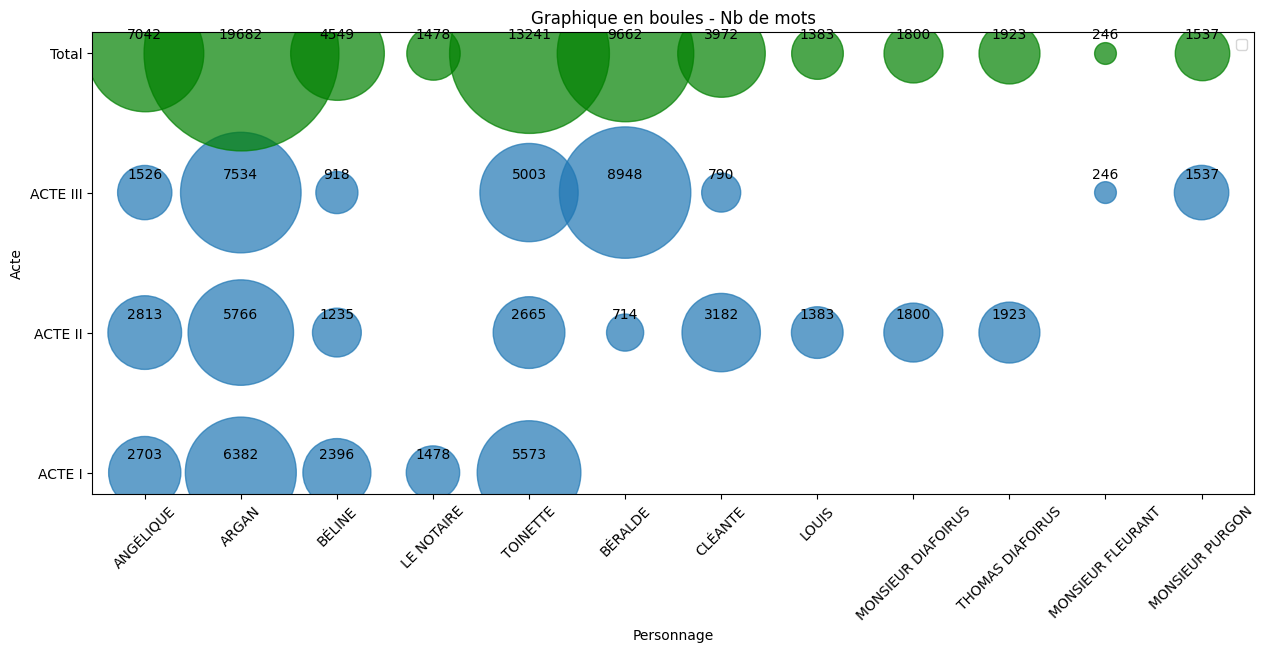

temps de traitement =  10.860958337783813


In [51]:
# Calculer le total par personnage
total_par_personnage = series.groupby(level='Personnage').sum()

# Création du graphique en boules initial
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(series.index.get_level_values('Personnage'), series.index.get_level_values('Acte'),
           s=series.values, alpha=0.7)

# Ajouter des boules pour le total par personnage
for personnage, total in total_par_personnage.items():
    ax.scatter(personnage, "Total", s=total, c='green', alpha=0.7)#, label=f'Total {personnage}')

# Configuration des axes et du titre
ax.set_xlabel('Personnage')
ax.set_ylabel('Acte')
ax.set_title('Graphique en boules - Nb de mots')
plt.xticks(rotation=45)

# Vérification
print(series.index.get_level_values('Personnage')) 
print(series.index.get_level_values('Acte'))

# Afficher la valeur dans la boule pour le graphique initial
for x, y, val in zip(series.index.get_level_values('Personnage'), series.index.get_level_values('Acte'), series.values):
    ax.annotate(str(val), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Afficher la valeur dans la boule pour le total par personnage
for personnage, total in total_par_personnage.items():
    ax.annotate(str(total), (personnage, "Total"), textcoords="offset points", xytext=(0, 10), ha='center')

# Légende pour les boules du total par personnage
ax.legend()

# Affichage du graphique
plt.show()
print("temps de traitement = ", time.time()-t1)

# Attribution des rôles

In [52]:
# On va partir du tableau suivant
data_select

,Index,Acte,Scène,Personnage,Nb de mots
0,193,ACTE I,SCÈNE I,ARGAN,0
1,196,ACTE I,SCÈNE II,TOINETTE,7
2,198,ACTE I,SCÈNE II,ARGAN,0
3,200,ACTE I,SCÈNE II,TOINETTE,0
4,202,ACTE I,SCÈNE II,ARGAN,13
...,...,...,...,...,...
984,2317,ACTE III,SCÈNE XIV,BÉRALDE,237
985,2319,ACTE III,SCÈNE XIV,ANGÉLIQUE,75
986,2321,ACTE III,SCÈNE XIV,BÉRALDE,266
987,2323,ACTE III,SCÈNE XIV,CLÉANTE,16


In [53]:
# On va lui rajouter une colonne 'acteur'
data_select['Acteur'] = ""
data_select

C:\Users\John\AppData\Local\Temp\ipykernel_3548\2534322931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['Acteur'] = ""


,Index,Acte,Scène,Personnage,Nb de mots,Acteur
0,193,ACTE I,SCÈNE I,ARGAN,0,
1,196,ACTE I,SCÈNE II,TOINETTE,7,
2,198,ACTE I,SCÈNE II,ARGAN,0,
3,200,ACTE I,SCÈNE II,TOINETTE,0,
4,202,ACTE I,SCÈNE II,ARGAN,13,
...,...,...,...,...,...,...
984,2317,ACTE III,SCÈNE XIV,BÉRALDE,237,
985,2319,ACTE III,SCÈNE XIV,ANGÉLIQUE,75,
986,2321,ACTE III,SCÈNE XIV,BÉRALDE,266,
987,2323,ACTE III,SCÈNE XIV,CLÉANTE,16,


In [54]:
# On enregistre ce tableau au format csv
data_select.to_csv("repartition.csv",index=False, sep=';')

In [55]:
# Après l'avoir modifié on le rappelle
df = pd.read_csv("repartition.csv", sep=';',encoding = "ISO-8859-1")

In [56]:
df

,Index,Acte,ScÃ¨ne,Personnage,Nb de mots,Acteur
0,193,ACTE I,SCÃNE I,ARGAN,0,NaN
1,196,ACTE I,SCÃNE II,TOINETTE,7,NaN
2,198,ACTE I,SCÃNE II,ARGAN,0,NaN
3,200,ACTE I,SCÃNE II,TOINETTE,0,NaN
4,202,ACTE I,SCÃNE II,ARGAN,13,NaN
...,...,...,...,...,...,...
908,2317,ACTE III,SCÃNE XIV,BÃRALDE,237,NaN
909,2319,ACTE III,SCÃNE XIV,ANGÃLIQUE,75,NaN
910,2321,ACTE III,SCÃNE XIV,BÃRALDE,266,NaN
911,2323,ACTE III,SCÃNE XIV,CLÃANTE,16,NaN


In [57]:
# On trace le graphe à partir des nouvelles infos
# le x et le y
list_acteur = df['Acteur'].unique().tolist()
list_stage = ['ACTE I','ACTE II', 'ACTE III']

In [58]:
# le tableau des données filtrées
df_filtered = df[df['Acte'].isin(list_stage) & df['Acteur'].isin(list_acteur)]

In [59]:
# On groupe par Acte et Acteur et on somme le nombre de mots
series = df_filtered.groupby(['Acte','Acteur'])['Nb de mots'].sum()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index([], dtype='float64', name='Acteur')
Index([], dtype='object', name='Acte')


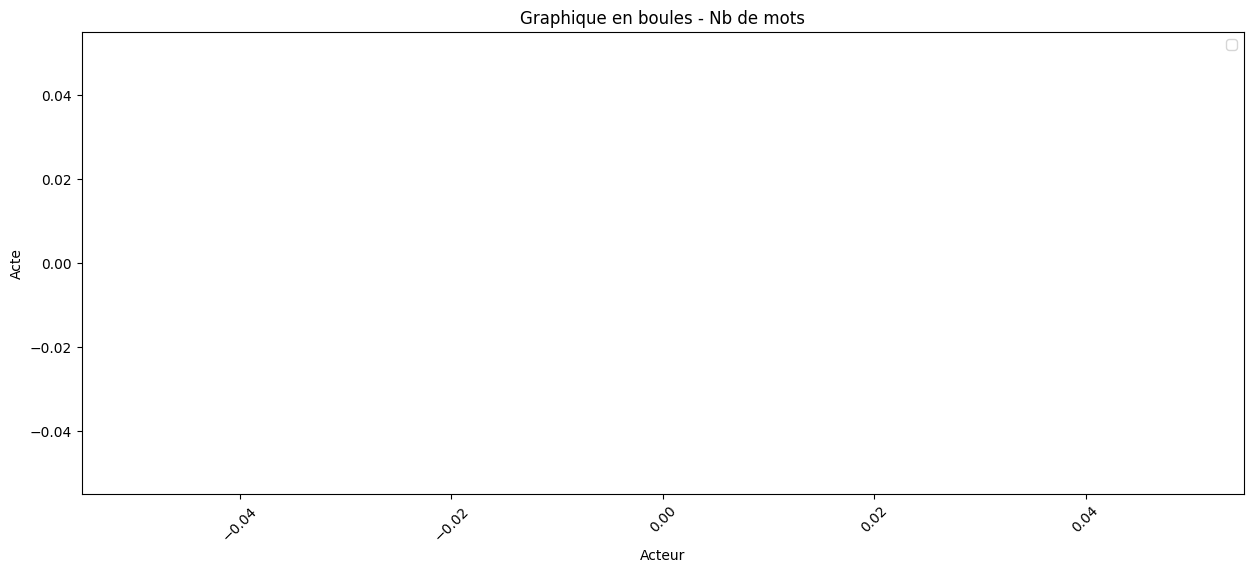

In [60]:
# Calculer le total par acteur
total_par_acteur = series.groupby(level='Acteur').sum()

# Création du graphique en boules initial
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(series.index.get_level_values('Acteur'), series.index.get_level_values('Acte'),
           s=series.values, alpha=0.7)

# Ajouter des boules pour le total par acteur
for acteur, total in total_par_acteur.items():
    ax.scatter(acteur, "Total", s=total, c='green', alpha=0.7)

# Configuration des axes et du titre
ax.set_xlabel('Acteur')
ax.set_ylabel('Acte')
ax.set_title('Graphique en boules - Nb de mots')
plt.xticks(rotation=45)

# Vérification
print(series.index.get_level_values('Acteur')) 
print(series.index.get_level_values('Acte'))

# Afficher la valeur dans la boule pour le graphique initial
for x, y, val in zip(series.index.get_level_values('Acteur'), series.index.get_level_values('Acte'), series.values):
    ax.annotate(str(val), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Afficher la valeur dans la boule pour le total par acteur
for acteur, total in total_par_acteur.items():
    ax.annotate(str(total), (acteur, "Total"), textcoords="offset points", xytext=(0, 10), ha='center')

# Légende pour les boules du total par acteur
ax.legend()

# Affichage du graphique
plt.show()

In [61]:
%who

BeautifulSoup	 RegexpTokenizer	 ax	 c	 col	 col_cleaned_struct	 data	 data_select	 db	 
del_doublons	 df	 df_corrected	 df_filtered	 doc	 element	 elements	 exclusion_list	 extract_structure	 
fi	 fig	 file	 file_response	 file_url	 highlighter	 href_value	 i	 index	 
indices_to_color	 label	 list_acteur	 list_nom_vide	 list_pers	 list_stage	 lnom	 lstage	 lstruct	 
nb	 new_href	 np	 os	 pd	 personnage	 plt	 r	 re	 
reduce	 requests	 response	 row	 series	 soup	 styled_df	 t1	 time	 
tokenizer	 total	 total_par_acteur	 total_par_personnage	 txt_links	 url	 val	 x	 y	 

